Keşifsel Veri Analizi (EDA - Exploratory Data Analysis)
Adımlar:
Kütüphaneler: Pandas, matplotlib, seaborn gibi kütüphaneleri kullanarak veri setinin genel özellikleri incelenir.
Görselleştirme: Veri seti ile ilgili grafikler ve görseller oluşturulur.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB
None
    neo_id                name  absolute_magnitude  estimated_diameter_min  \
0  2162117  162117 (1998 SD15)               19.14                0.394962   
1  2349507    349507 (2008 QY)               18.50             

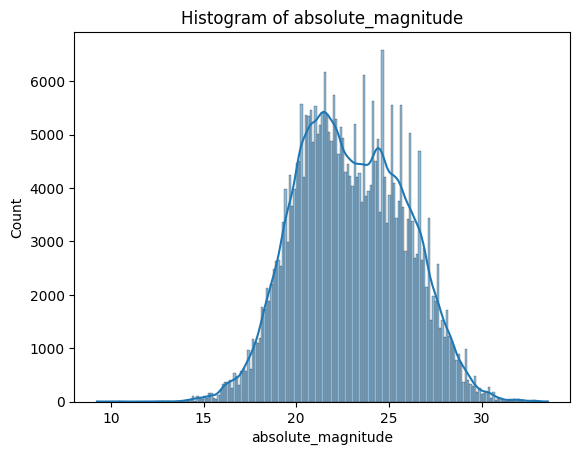

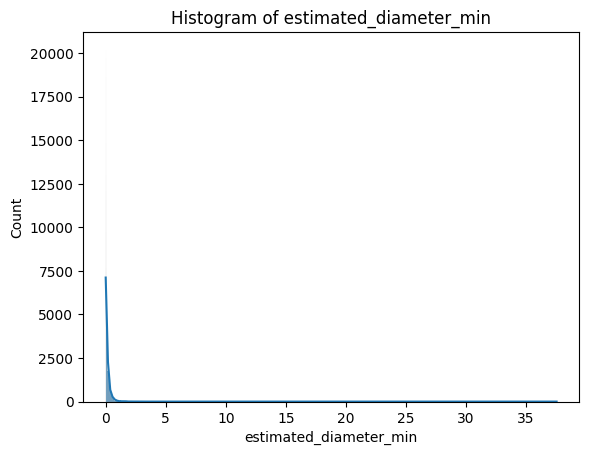

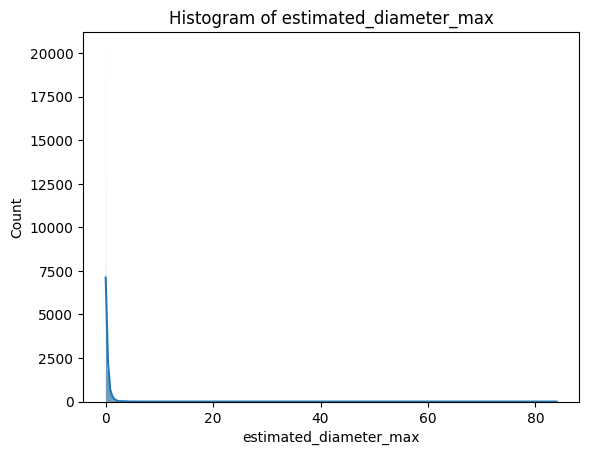

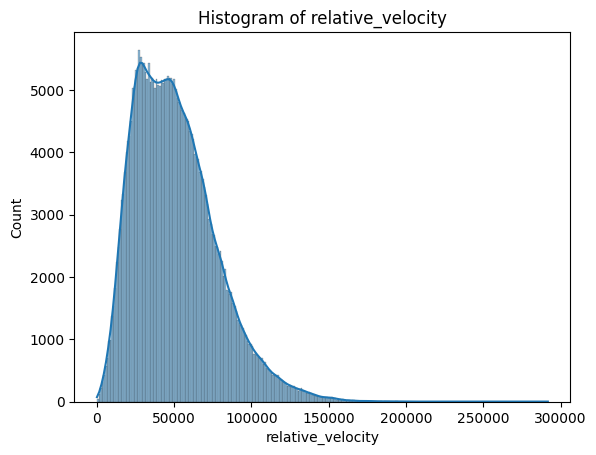

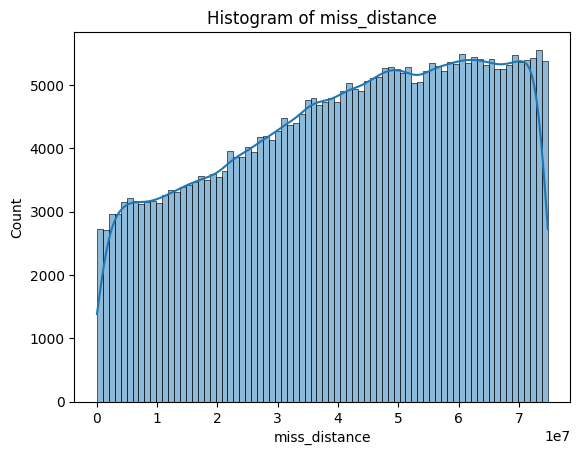

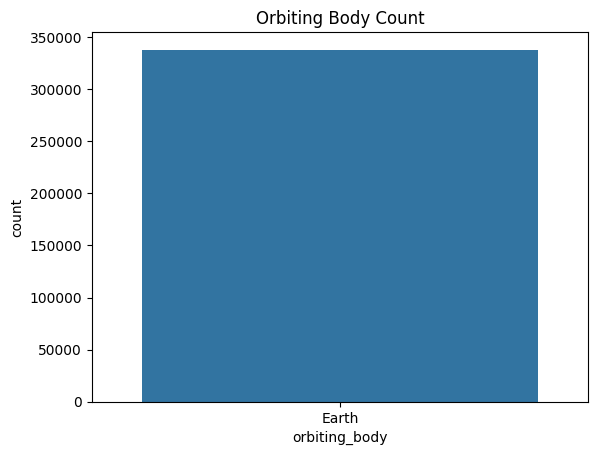

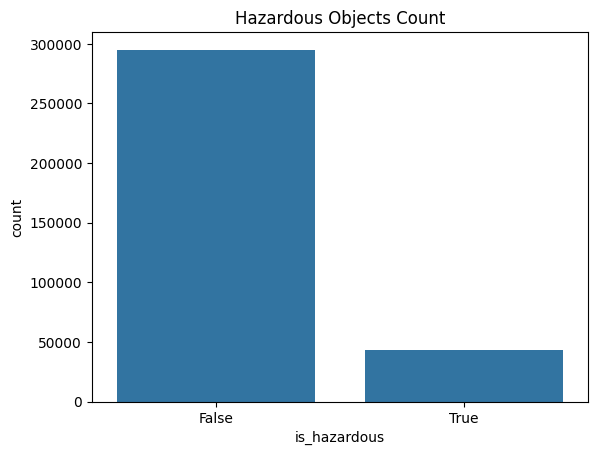

In [1]:
#Gerekli kütüphaneler eklenir.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error, r2_score, silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.cluster import KMeans

#Gereksiz uyarılar kapanır
import warnings
warnings.filterwarnings("ignore")

# Veri setini yükleyin
data = pd.read_csv('nearest-earth-objects(1910-2024).csv')

# Veri seti hakkında genel bilgi verir
print(data.info())

# İlk birkaç satırı görüntüleyin
print(data.head())

# Veri setinin son 5 satırını görüntüleyin
print(data.tail())

# Temel istatistikler
print(data.describe())

# Veri setinin boyutunu kontrol edin
print(data.shape)

# Eksik verilerin kontrolü
print(data.isnull().sum())

# Sayısal veriler için histogram
numerical_columns = ['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity', 'miss_distance']
for col in numerical_columns:
    plt.figure()
    sns.histplot(data[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

# Kategorik veriler için barplot veya countplot
# 'orbiting_body' ve 'is_hazardous' için
plt.figure()
sns.countplot(x='orbiting_body', data=data)
plt.title('Orbiting Body Count')
plt.show()

plt.figure()
sns.countplot(x='is_hazardous', data=data)
plt.title('Hazardous Objects Count')
plt.show()


Veri Ön İşleme
Adımlar:
Temizlik: Eksik verileri kontrol edin ve gerekirse temizleyin.
Normalizasyon ve Dönüşüm: Özellikleri normalleştirin, kategorik değişkenleri label-encoding veya one-hot encoding ile işleyin.
Eğitim ve Test Kümesi: Veri kümesini eğitim ve test kümelerine bölün.

In [2]:
# Eksik verileri temizleme
data.dropna(inplace=True)

# Veri setindeki sütun isimlerini kontrol edin
print(data.columns)

# Özelliklerin ve etiketlerin ayrılması
X = data.drop('is_hazardous', axis=1)
y = data['is_hazardous']

# Sayısal olmayan sütunları kontrol edin ve çıkarın veya dönüştürün
# Yöntem 1: Sayısal olmayan sütunları çıkartma
X = X.select_dtypes(include=['number'])

# Eğitim ve test kümesine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizasyon
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



Index(['neo_id', 'name', 'absolute_magnitude', 'estimated_diameter_min',
       'estimated_diameter_max', 'orbiting_body', 'relative_velocity',
       'miss_distance', 'is_hazardous'],
      dtype='object')


Algoritma Seçimi & Hiperparametre Optimizasyonu
Adımlar:
Model Seçimi: Gözetimli öğrenme için Random Forest modeli ve gözetimsiz öğrenme için K-Means modeli seçilir.
Eğitim: Modeller eğitilir ve performanslar incelenir.
Optimizasyon: En iyi performansı gösteren model için hiperparametre optimizasyonu gerçekleştirilir.

Gözetimli Öğrenme Algoritmaları

Random Forest Metodu

Çapraz Doğrulama Skorları: [0.97432912 0.97403293 0.9746798  0.97543756 0.97492007]
Ortalama Çapraz Doğrulama Skoru: 0.9746798960241021
Fitting 5 folds for each of 36 candidates, totalling 180 fits
En İyi Hiperparametreler: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 200}
Doğruluk: 0.979803356250462
Kesinlik: 0.9360048573163328
Duyarlılık: 0.9018369018369018
F1 Puanı: 0.9186032654034084
Karışıklık Matrisi:
 [[58561   527]
 [  839  7708]]


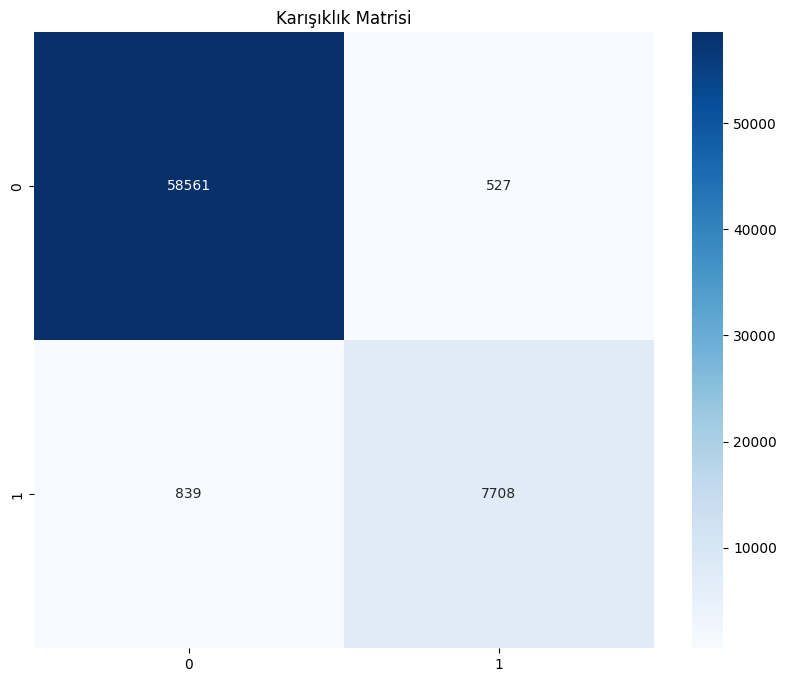

Classification Report:
               precision    recall  f1-score   support

       False       0.99      0.99      0.99     59088
        True       0.94      0.90      0.92      8547

    accuracy                           0.98     67635
   macro avg       0.96      0.95      0.95     67635
weighted avg       0.98      0.98      0.98     67635



In [5]:
# Modeli tanımlama
rf_weighted = RandomForestClassifier(class_weight='balanced', random_state=42)

# Çapraz doğrulama ile modelin performansını değerlendirme
cv_scores = cross_val_score(rf_weighted, X_train_scaled, y_train, cv=5)
print(f"Çapraz Doğrulama Skorları: {cv_scores}")
print(f"Ortalama Çapraz Doğrulama Skoru: {np.mean(cv_scores)}")

# Hiperparametre optimizasyonu (Grid Search)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=rf_weighted, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)
print(f"En İyi Hiperparametreler: {grid_search.best_params_}")

# En iyi model ile tahmin yapma
best_rf = grid_search.best_estimator_
y_pred_weighted = best_rf.predict(X_test_scaled)

# Performans değerlendirmesi
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
report_weighted = classification_report(y_test, y_pred_weighted)
precision_weighted = precision_score(y_test, y_pred_weighted)
recall_weighted= recall_score(y_test, y_pred_weighted)
f1_score_weighted= f1_score(y_test, y_pred_weighted)
conf_matrix = confusion_matrix(y_test, y_pred_weighted)

#Doğruluk çıktısı
print(f"Doğruluk: {accuracy_weighted}")

#Kesinlik çıktısı
print(f"Kesinlik: {precision_weighted}")

#Duyarlılık çıktısı
print(f"Duyarlılık: {recall_weighted}")

#F1 Puanı çıktısı
print(f"F1 Puanı: {f1_score_weighted}")

#Karışıklık Matrisi
print(f"Karışıklık Matrisi:\n {conf_matrix}")

# Görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(2), yticklabels=np.arange(2))
plt.title('Karışıklık Matrisi')
plt.show()

#Sınıflandırma Raporu çıktısı
print(f"Classification Report:\n {report_weighted}")


RandomForestRegressor

In [6]:
# Modeli tanımlama
rf_regressor = RandomForestRegressor(random_state=42)

# Çapraz doğrulama ile modelin performansını değerlendirme
cv_scores = cross_val_score(rf_regressor, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Çapraz Doğrulama Skorları (Negatif MSE): {cv_scores}")
print(f"Ortalama Çapraz Doğrulama Skoru (Negatif MSE): {np.mean(cv_scores)}")

# Hiperparametre optimizasyonu (Grid Search)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)
print(f"En İyi Hiperparametreler: {grid_search.best_params_}")

# En iyi model ile tahmin yapma
best_rf_regressor = grid_search.best_estimator_
y_pred = best_rf_regressor.predict(X_test_scaled)

# Performans değerlendirmesi
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Ortalama Karesel Hata (MSE): {mse}")
print(f"Ortalama Mutlak Hata (MAE): {mae}")
print(f"R-Kare (R²) Skoru: {r2}")


Çapraz Doğrulama Skorları (Negatif MSE): [-0.02145228 -0.02151575 -0.02131142 -0.02126772 -0.02140523]
Ortalama Çapraz Doğrulama Skoru (Negatif MSE): -0.02139048015127403
Fitting 5 folds for each of 36 candidates, totalling 180 fits
En İyi Hiperparametreler: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Ortalama Karesel Hata (MSE): 0.01803394876912841
Ortalama Mutlak Hata (MAE): 0.05067975160789532
R-Kare (R²) Skoru: 0.8366493653805481


Gözetimsiz Öğrenme Algoritmaları

K-Means Metodu

k=2 için Silhouette Skoru: 0.26243137977962455
k=2 için Davies-Bouldin Skoru: 1.4532705750202262
k=2 için Calinski-Harabasz Skoru: 24850.55953990036
k=2 için Inertia: 1238498.0294166335
k=3 için Silhouette Skoru: 0.2619930060273644
k=3 için Davies-Bouldin Skoru: 1.4556209605724961
k=3 için Calinski-Harabasz Skoru: 24858.229990747608
k=3 için Inertia: 1064219.3090256937
k=4 için Silhouette Skoru: 0.29154190859661533
k=4 için Davies-Bouldin Skoru: 1.2852736935521019
k=4 için Calinski-Harabasz Skoru: 24506.74202552871
k=4 için Inertia: 845755.7322087944
k=5 için Silhouette Skoru: 0.2864132210977454
k=5 için Davies-Bouldin Skoru: 1.1788905185729415
k=5 için Calinski-Harabasz Skoru: 23775.537603551886
k=5 için Inertia: 707519.0918807951
k=6 için Silhouette Skoru: 0.2627995619385045
k=6 için Davies-Bouldin Skoru: 1.1493767259970908
k=6 için Calinski-Harabasz Skoru: 22990.96680505978
k=6 için Inertia: 617242.7820044702
k=7 için Silhouette Skoru: 0.2609579430435438
k=7 için Davies-Bouldin Skor

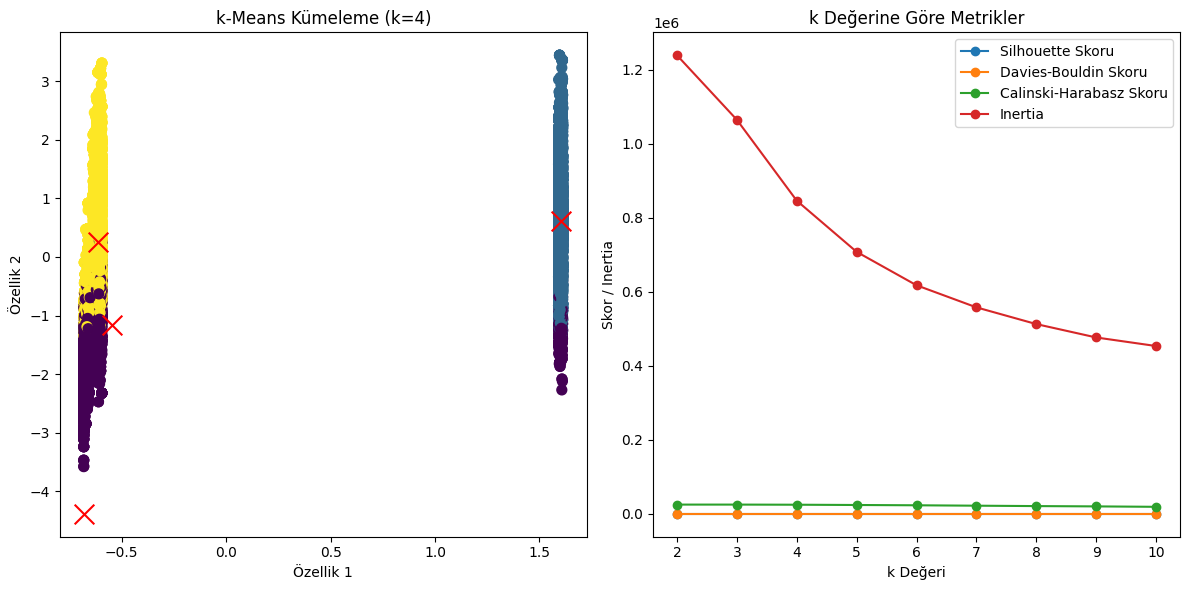

In [7]:
# Farklı k değerleri için k-Means uygulama
k_values = range(2, 11)  # k değerleri 2'den 10'a kadar
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []
inertia_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    labels = kmeans.predict(X_test_scaled)
    
    silhouette_avg = silhouette_score(X_test_scaled, labels)
    davies_bouldin_avg = davies_bouldin_score(X_test_scaled, labels)
    calinski_harabasz_avg = calinski_harabasz_score(X_test_scaled, labels)
    inertia_avg = kmeans.inertia_
    
    silhouette_scores.append(silhouette_avg)
    davies_bouldin_scores.append(davies_bouldin_avg)
    calinski_harabasz_scores.append(calinski_harabasz_avg)
    inertia_scores.append(inertia_avg)
    
    print(f"k={k} için Silhouette Skoru: {silhouette_avg}")
    print(f"k={k} için Davies-Bouldin Skoru: {davies_bouldin_avg}")
    print(f"k={k} için Calinski-Harabasz Skoru: {calinski_harabasz_avg}")
    print(f"k={k} için Inertia: {inertia_avg}")

# En iyi k değerini seçme
best_k_silhouette = k_values[np.argmax(silhouette_scores)]
best_k_davies_bouldin = k_values[np.argmin(davies_bouldin_scores)]
best_k_calinski_harabasz = k_values[np.argmax(calinski_harabasz_scores)]
best_k_inertia = k_values[np.argmin(inertia_scores)]

print(f"En İyi k Değeri (Silhouette Skoru): {best_k_silhouette}")
print(f"En İyi k Değeri (Davies-Bouldin Skoru): {best_k_davies_bouldin}")
print(f"En İyi k Değeri (Calinski-Harabasz Skoru): {best_k_calinski_harabasz}")
print(f"En İyi k Değeri (Inertia): {best_k_inertia}")

# En iyi k değeri ile k-Means Kümeleme
best_kmeans = KMeans(n_clusters=best_k_silhouette, random_state=42)
best_kmeans.fit(X_train_scaled)
best_labels = best_kmeans.predict(X_test_scaled)
best_silhouette_score = silhouette_score(X_test_scaled, best_labels)
best_davies_bouldin_score = davies_bouldin_score(X_test_scaled, best_labels)
best_calinski_harabasz_score = calinski_harabasz_score(X_test_scaled, best_labels)
best_inertia = best_kmeans.inertia_

print(f"En İyi k-Değeri ile Silhouette Skoru: {best_silhouette_score}")
print(f"En İyi k-Değeri ile Davies-Bouldin Skoru: {best_davies_bouldin_score}")
print(f"En İyi k-Değeri ile Calinski-Harabasz Skoru: {best_calinski_harabasz_score}")
print(f"En İyi k-Değeri ile Inertia: {best_inertia}")

# Kümeleme Sonuçlarını Görselleştirme
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=best_labels, cmap='viridis', s=50, marker='o')
plt.scatter(best_kmeans.cluster_centers_[:, 0], best_kmeans.cluster_centers_[:, 1], c='red', s=200, marker='x')
plt.title(f'k-Means Kümeleme (k={best_k_silhouette})')
plt.xlabel('Özellik 1')
plt.ylabel('Özellik 2')

# Metriklerin Grafiği
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', label='Silhouette Skoru')
plt.plot(k_values, davies_bouldin_scores, marker='o', label='Davies-Bouldin Skoru')
plt.plot(k_values, calinski_harabasz_scores, marker='o', label='Calinski-Harabasz Skoru')
plt.plot(k_values, inertia_scores, marker='o', label='Inertia')
plt.xlabel('k Değeri')
plt.ylabel('Skor / Inertia')
plt.title('k Değerine Göre Metrikler')
plt.legend()

plt.tight_layout()
plt.show()
